In [ ]:
import numpy as np
import pandas as pd 
import skimage
import os 
import random

import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

from tensorflow.keras.layers import Conv2D,MaxPooling2D,BatchNormalization,Flatten,Dense
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.callbacks import EarlyStopping , ReduceLROnPlateau
from keras.layers import GaussianNoise

In [ ]:
train_data = pd.read_csv('../input/digit-recognizer/train.csv')
test_data = pd.read_csv('../input/digit-recognizer/test.csv')


In [ ]:
label_index_list = [None]*10

for i, label in enumerate(train_data.get('label')):
    if label_index_list[label]:
        label_index_list[label].append(i)
    else:
        label_index_list[label] = [i]
train_data.pop('label')


0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

In [ ]:
X = train_data.to_numpy()
X =  X.reshape((X.shape[0],28,28,1))
random_indexes = [i for i in range(20997)]
random.shuffle(random_indexes)
new_X = [None] * 20997
y = [None] * 20997 

for i in range(len(label_index_list)):
    indexes = label_index_list[i]
    for j in range(1, len(indexes), 2):
        new_image = []
        ind1, ind2 = indexes[j-1], indexes[j]
        for k in range(len(X[0])):
            new_image.append(np.append(X[ind1][k], X[ind2][k]))
        index = random_indexes.pop()
        new_X[index] = np.array(new_image)
        y[index] = i

y = np.array(y)
y = y.reshape((y.shape[0],1))
X = np.array(new_X)  

X = X.reshape(X.shape[0], 28, 56, 1)

X = X.astype("float32")
X = X/255.0
y = y.astype("float32")

print(f"train data and label have shape = {X.shape} , {y.shape} respectively.")


train data and label have shape = (20997, 28, 56, 1) , (20997, 1) respectively.


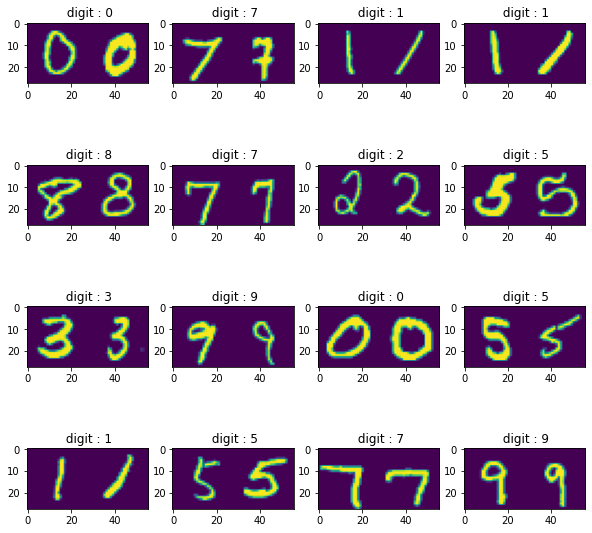

In [ ]:
fig = plt.figure(figsize=(10,10))
count=0
for i in range(4):
    for j in range(4):
        plt.subplot(4,4,count+1);
        plt.title(f" digit : {int(y[count][0])}")
        plt.imshow(X[count]);
        
        count+=1;

In [ ]:
X_train,X_valid,y_train,y_valid = train_test_split(X, y, test_size=0.1, random_state=42)


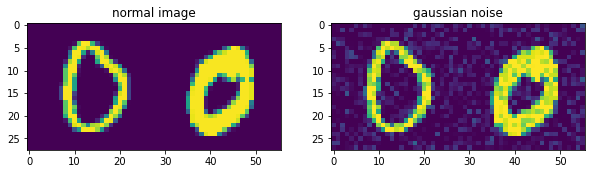

In [ ]:

fig = plt.figure(figsize=(10,10))
plt.subplot(1,2,1);
plt.imshow(X[0]);
plt.title("normal image")
plt.subplot(1,2,2);
plt.imshow(X[0]);
gimg = skimage.util.random_noise(X[0], mode="gaussian")
plt.title("gaussian noise")
plt.imshow(gimg)

In [ ]:
model=Sequential()

model.add(GaussianNoise(0.01, input_shape=(28,56,1)))
model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu", input_shape=(28,56,1)))
model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu",padding="same"))

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu",padding="same"))

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())    
model.add(Conv2D(filters=256, kernel_size = (3,3), activation="relu"))
    
model.add(MaxPooling2D(pool_size=(2,2)))
    
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(512,activation="relu"))
    
model.add(Dense(10,activation="softmax"))
    
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])



User settings:

   KMP_AFFINITY=granularity=fine,verbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_DUPLICATE_LIB_OK=True
   KMP_INIT_AT_FORK=FALSE
   KMP_SETTINGS=1
   KMP_WARNINGS=0

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=true
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_PLAIN_BARRIER='2,2'
   KMP_PLAIN_BARRIER_P

In [ ]:
earlystopper = EarlyStopping(patience=5,restore_best_weights=True)
reduce_learing_rate = ReduceLROnPlateau(patience=1)
callback_list = [earlystopper,reduce_learing_rate]

In [ ]:
model.fit(X_train,y_train,validation_split=0.1,epochs=4,batch_size=64,callbacks=callback_list)

2022-01-31 19:35:37.487635: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/4
266/266 [==============================] - 125s 465ms/step - loss: 0.0882 - accuracy: 0.9754 - val_loss: 5.1193 - val_accuracy: 0.2820
Epoch 2/4
266/266 [==============================] - 123s 463ms/step - loss: 0.0224 - accuracy: 0.9941 - val_loss: 0.1671 - val_accuracy: 0.9635
Epoch 3/4
266/266 [==============================] - 124s 467ms/step - loss: 0.0280 - accuracy: 0.9939 - val_loss: 0.1160 - val_accuracy: 0.9868
Epoch 4/4
266/266 [==============================] - 123s 463ms/step - loss: 0.0171 - accuracy: 0.9963 - val_loss: 0.0176 - val_accuracy: 0.9947


In [ ]:
predictions = model.predict(X_valid)
predictions = np.argmax(predictions,axis=1)
print(predictions)

[8 4 2 ... 7 5 3]


{8: 188, 4: 206, 2: 235, 0: 209, 6: 206, 9: 199, 5: 191, 3: 220, 7: 229, 1: 217}


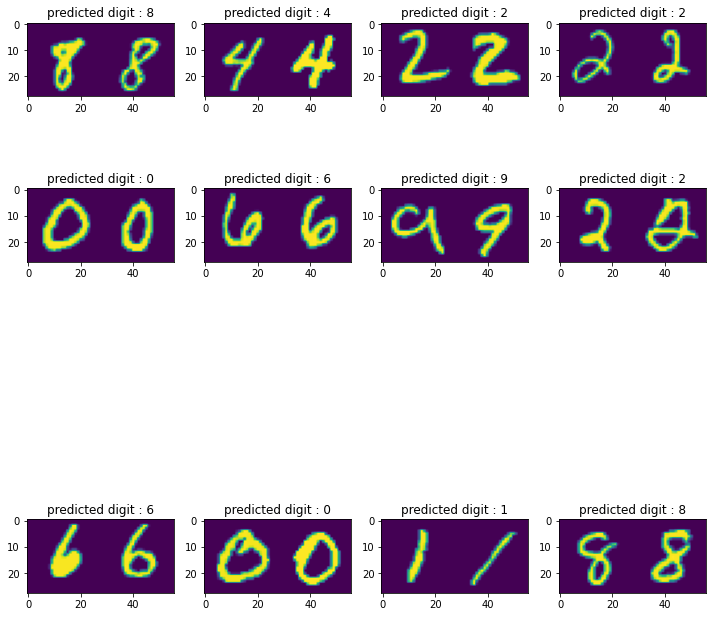

In [ ]:
fig = plt.figure(figsize=(10,10))
count_map = dict()

for pred in predictions:
    if pred not in count_map:
        count_map[pred] = 1
    else:
        count_map[pred]+= 1
        
print(count_map)

count=0
for i in range(4):
    for j in range(4):
        plt.subplot(4,4,count+1);
        plt.imshow(X_valid[count]);
        plt.title(f"predicted digit : {predictions[count]}")
        plt.tight_layout()
        count+=1;

In [ ]:
hits = []
for i,pred in enumerate(predictions):
    if pred == y_valid[i]:
        hits.append(1)
    else:
        hits.append(0)

sm = sum(hits)
acc = sm/len(predictions)

print("The validation accuracy of 2 digit recognition was ", round(acc,4)*100, "%")

The validation accuracy of 2 digit recognition was  99.62 %
